In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [2]:
## image size = 28*28 of numpy array 
## image range = 0 to 255
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 
               'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 
               'Bag', 'Ankle boot']

In [4]:
len(train_labels)

60000

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(test_labels)

10000

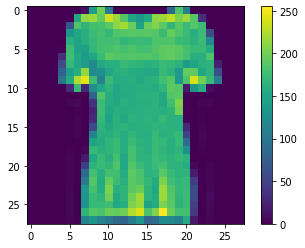

In [8]:
## For the first image, the range of pixels' value is 0 to 255
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
##Since 255 is the maximum value, dividing by 255 expresses a 0-1 representation
train_images = train_images / 255.0
test_images = test_images / 255.5

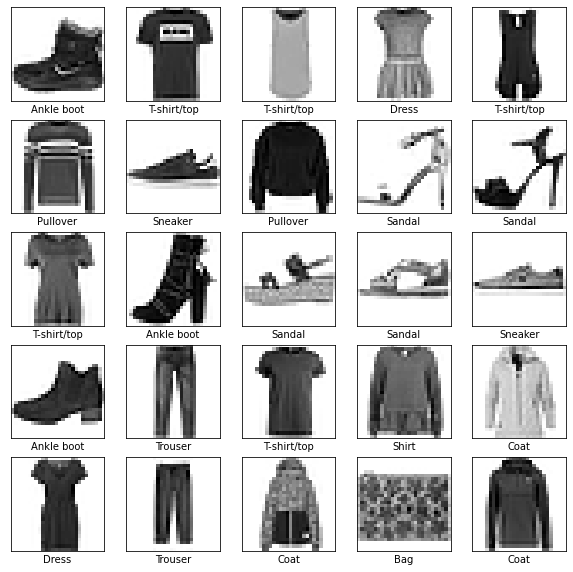

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
## Modeling
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'), ##densely-connected or fully-connected
    tf.keras.layers.Dense(10)
])

In [12]:
## Compiling Model
#Loss Function, Optimizer, Metircs
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
## Training Model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5030 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3773 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2817 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2595 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2504 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3294 - accuracy: 0.8849 - 571ms/epoch - 2ms/step

Test accuracy: 0.8848999738693237


In [15]:
## Pradiction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

In [17]:
##The results are confidence of the model depending on 10 clothes.
predictions[0]

array([3.3981974e-06, 6.3489738e-09, 1.4136387e-08, 1.7558438e-10,
       6.4963750e-09, 1.0762427e-03, 1.1093767e-08, 4.3544974e-02,
       6.8699148e-07, 9.5537466e-01], dtype=float32)

In [18]:
##Find the highest confidence value
#The model predicted the value is 'Ankle boots'
np.argmax(predictions[0])

9

In [19]:
##Confirm the result whether the value trained is corresponded with the test's value
test_labels[0]

9

In [20]:
##Visualize all the predictions to the graph.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

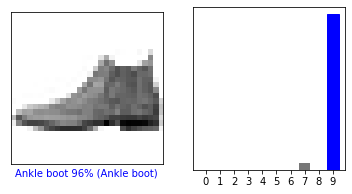

In [21]:
##Conduct predictions of the images using the trained model
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

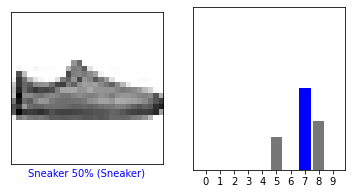

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

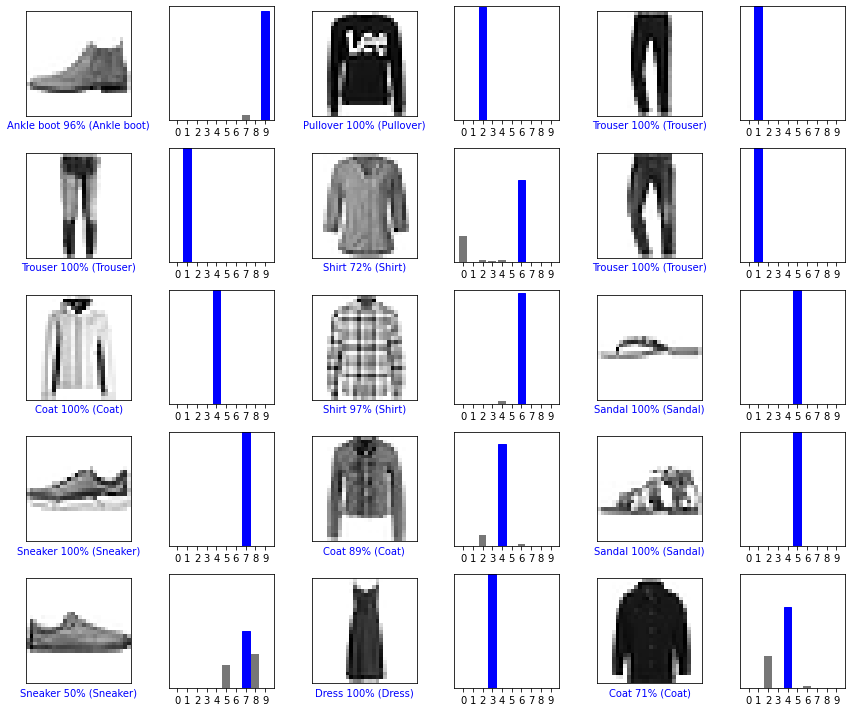

In [23]:
##Plot the first X test images, their predicted labels, and the true labels.
#Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
##Employ the trained model
#Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
##Make an array consisted two dimentions due to tf.keras
#>>Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
#img = np.squeeze(img, axis=0)
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0900667e-05 2.9423151e-11 9.9757642e-01 1.3181933e-11 1.8223281e-03
  2.8330648e-14 5.8036676e-04 5.1230331e-15 1.1328539e-08 1.1368733e-12]]


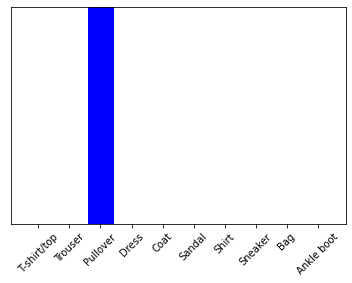

In [27]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2